dataset link - https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.DataFrame(pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Dataset\\Advertising.csv"))
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


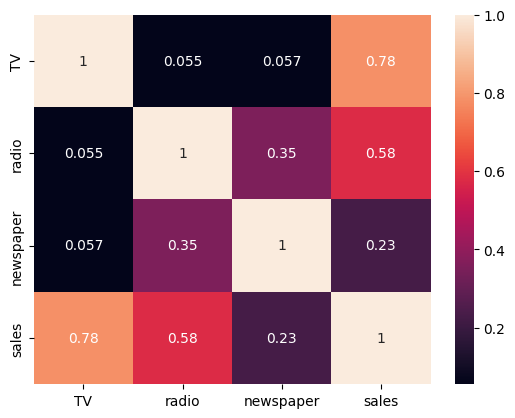

In [6]:
sns.heatmap(advertising.corr(), annot = True)
plt.show()

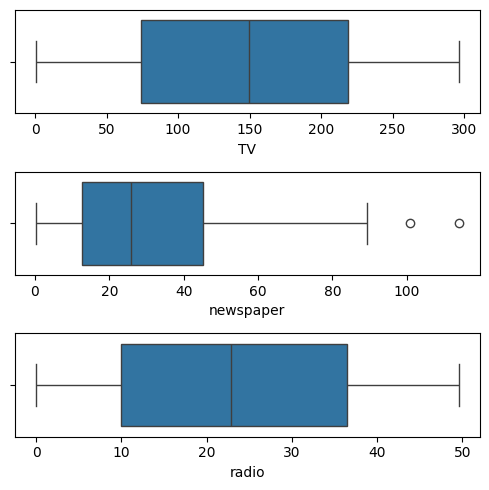

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0], orient='h')
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1], orient='h')
plt3 = sns.boxplot(advertising['radio'], ax = axs[2], orient='h')
plt.tight_layout()

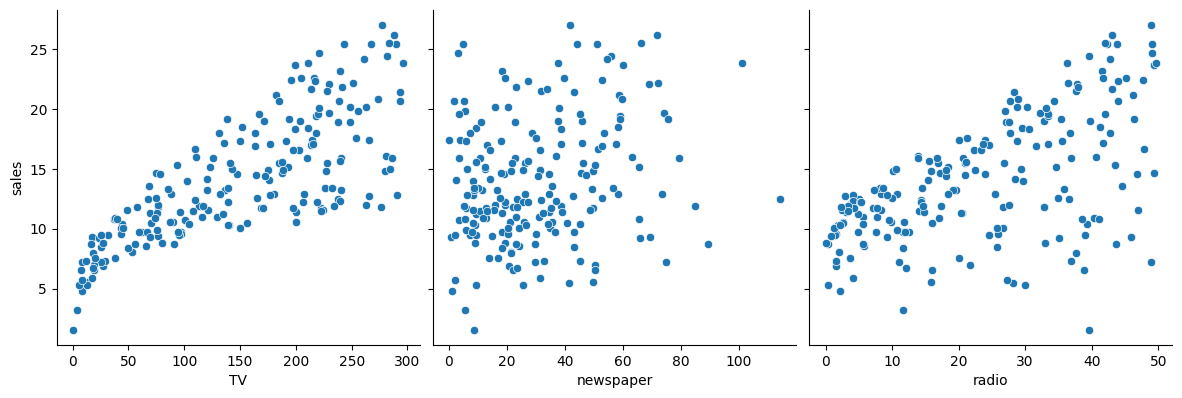

In [8]:
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

In [9]:
feature_cols = ['TV', 'radio','newspaper']
X = advertising[feature_cols]
y = advertising.sales

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [12]:
X_test

,TV,radio,newspaper
126,7.8,38.9,50.6
104,238.2,34.3,5.3
99,135.2,41.7,45.9
92,217.7,33.5,59.0
111,241.7,38.0,23.2
167,206.8,5.2,19.4
116,139.2,14.3,25.6
96,197.6,3.5,5.9
52,216.4,41.7,39.6
69,216.8,43.9,27.2


In [13]:
from sklearn.linear_model import LinearRegression
SalesPrediction = LinearRegression()
SalesPrediction.fit(X_train, y_train)

print(SalesPrediction.intercept_)
print(SalesPrediction.coef_)

list(zip(feature_cols, SalesPrediction.coef_))

regr_preds = SalesPrediction.predict(X_test)

2.652789668879496
[0.0454256  0.18975773 0.00460308]


In [14]:

print("RMSE :", np.sqrt(mean_squared_error(y_test, regr_preds)))
print("R^2: ", r2_score(y_test, regr_preds))

RMSE : 1.3603977338130553
R^2:  0.9058622107532246


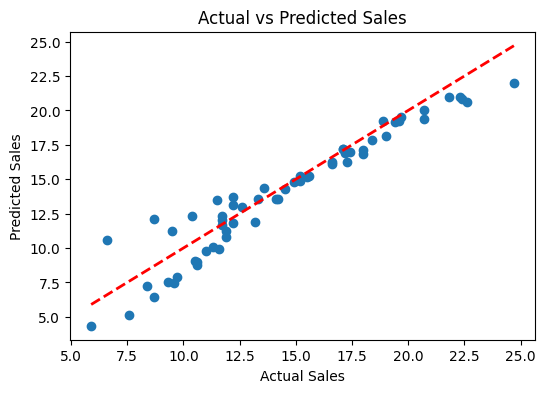

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, regr_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [16]:
predicted_Sale = SalesPrediction.predict([[7.8	,38.9	,50.6]])
print(predicted_Sale)

[10.62160072]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
import pickle
import os

# Define the path to save the model
directory = r'C:\\Users\\PC\\Desktop\\Python\\Python Notebooks'
if not os.path.exists(directory):
    os.makedirs(directory)
filename = os.path.join(directory, 'sales_prediction_model.pkl')

# Save the model to disk

with open(filename, 'wb') as file:
    pickle.dump(SalesPrediction, file)
print(f"Model saved to {filename}")

Model saved to C:\\Users\\PC\\Desktop\\Python\\Python Notebooks\sales_prediction_model.pkl
